<a href="https://colab.research.google.com/github/gokturkberke/AI-Bootcamp/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

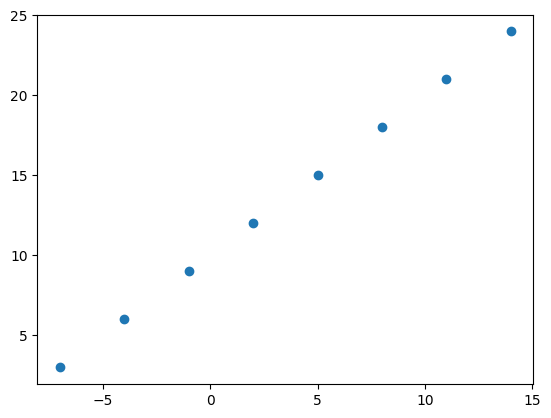

In [3]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [5]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
#Turn our Numpy Arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

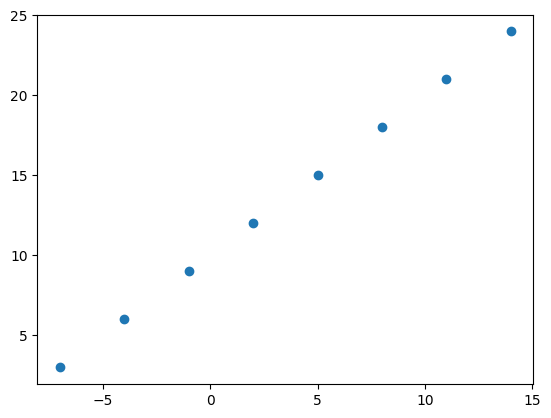

In [12]:
plt.scatter(X,y)

#Steps in modelling TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling a model define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y


1.   Loss = How wrong your models predictions compared to the truth label
2.   Optimizer = How your model should update its internal paterns to better its predictions
3.   Metrics = Human interpretable values for how well your model is doing




In [14]:
tf.random.set_seed(42)
# Create the model using Sequential API
model = tf.keras.Sequential([ #sequential katmanlari sirayla(ardisik) eklemek icin kullanilan model tipi
    tf.keras.layers.Dense(1) #icinde 1 adet nöron var yani bu model giristeki veriyi alip tek bir cikti degeri uretir
])

#2. Compile the modle
model.compile(loss = tf.keras.losses.mae, # hata fonksiyonu mae
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastics gradient descent = agirliklari adim adim guncelleyerek kaybi azaltmaya calisir (ogrenme algoritmasi sgd)
              metrics=["mae"]) #egitim sirasinda takip etmek istedigimiz metrik
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #epochs = 5 tüm veri setini 5 kez bastan sona modelin gormesini sagliyoruz
#Burada axis=-1, sonuna yeni bir boyut ekliyor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - loss: 16.0977 - mae: 16.0977
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.8165 - mae: 15.8165
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.5352 - mae: 15.5352
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.2540 - mae: 15.2540
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.9727 - mae: 14.9727


X = [1, 2, 3, 4]
X.shape → (4,)

tf.expand_dims(X, axis=-1).shape → (4, 1)
bu yuzden fitte tf.expand_dims kullaniyoruz

In [20]:
# Try and make prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[-6.340204]], dtype=float32)

In [22]:
#Improving our model (options are adding more layers change the activation function ...)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 14.5274 - mae: 14.5274
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.3949 - mae: 14.3949
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14.2624 - mae: 14.2624
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.1299 - mae: 14.1299
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.9974 - mae: 13.9974
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 13.8649 - mae: 13.8649
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.7324 - mae: 13.7324
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.5999 - mae: 13.5999
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.4674 - mae: 13.4674
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.3349 - mae: 13.3349
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.2024 - mae: 13.2024
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.0699 - mae: 13.0699
Epoch 13/100
1/1 ━━━━━━━

In [23]:
model.predict(tf.expand_dims([17.0],axis=-1)) #much more better

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[29.817295]], dtype=float32)